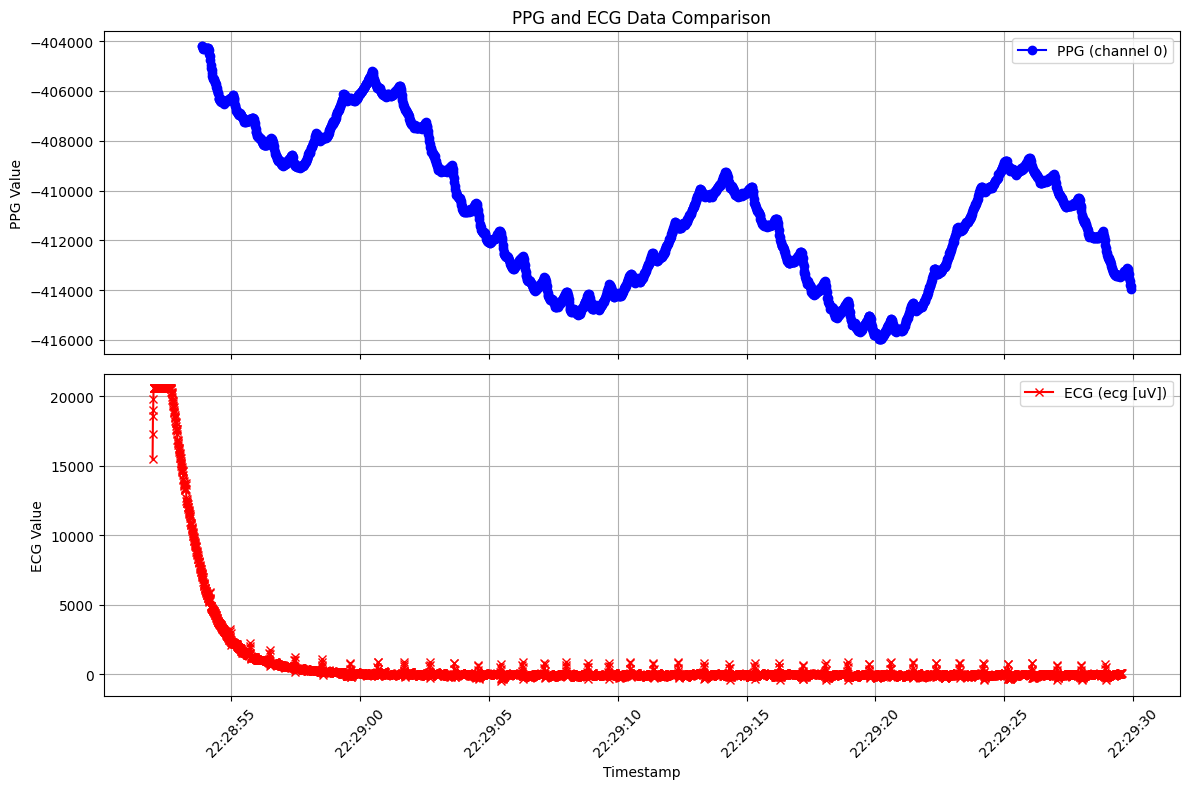

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to read and extract data from a file
def extract_data(file_path, header_name):
    data = {}  # Dictionary to store extracted data
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        headers = lines[0].strip().split(';')  # Split the header line by ';'
        header_index = headers.index(header_name)  # Find the index of the desired header
        
        for line in lines[1:]:  # Iterate over data lines (excluding the header)
            values = line.strip().split(';')  # Split the line by ';'
            key = values[0]  # Use the first value as the key (timestamp)
            data[key] = float(values[header_index])  # Store the desired value (convert to float)
            
    return data

# File paths
ppg_file_path = 'polar3/Polar_Sense_9F124324_20240425_222851_PPG_fixed.txt'
ecg_file_path = 'polar3/Polar_H10_83A00120_20240425_222850_ECG.txt'

# Extract 'channel 0' from the PPG file
ppg_data = extract_data(ppg_file_path, 'channel 0')

# Extract 'ecg [uV]' from the ECG file
ecg_data = extract_data(ecg_file_path, 'ecg [uV]')

# Convert timestamps to datetime objects for easier plotting
ppg_timestamps = list(ppg_data.keys())
ecg_timestamps = list(ecg_data.keys())

# Convert timestamps to datetime objects (assuming ISO format)
ppg_timestamps = [pd.to_datetime(ts) for ts in ppg_timestamps]
ecg_timestamps = [pd.to_datetime(ts) for ts in ecg_timestamps]

# Create subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot PPG data on the first subplot (ax1)
ax1.plot(ppg_timestamps, list(ppg_data.values()), label='PPG (channel 0)', marker='o', color='b')
ax1.set_ylabel('PPG Value')
ax1.set_title('PPG and ECG Data Comparison')
ax1.grid(True)
ax1.legend()

# Plot ECG data on the second subplot (ax2)
ax2.plot(ecg_timestamps, list(ecg_data.values()), label='ECG (ecg [uV])', marker='x', color='r')
ax2.set_ylabel('ECG Value')
ax2.set_xlabel('Timestamp')
ax2.grid(True)
ax2.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


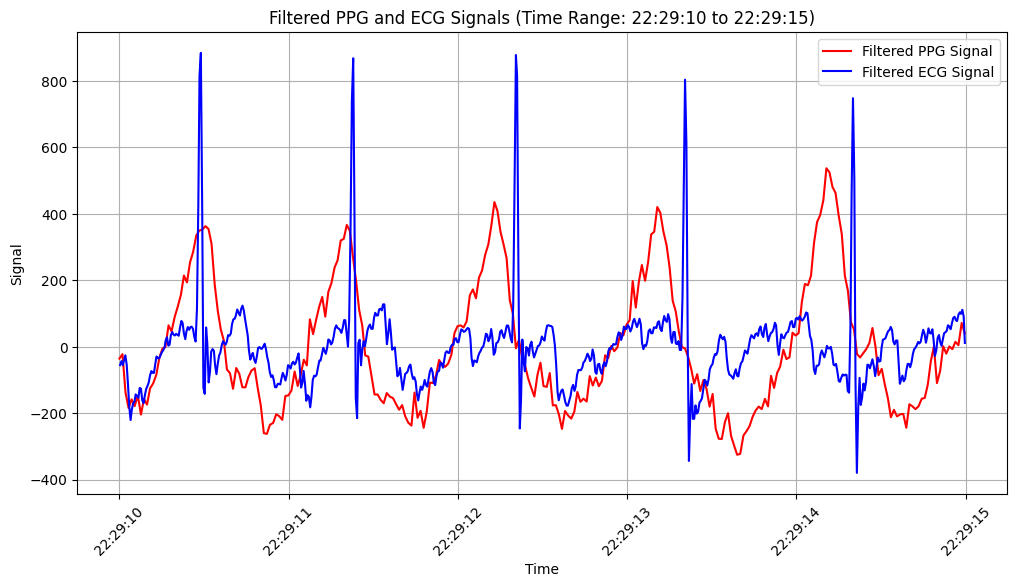

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Load PPG data
ppg_file = 'polar3/Polar_Sense_9F124324_20240425_222851_PPG_fixed.txt'
ppg_data = pd.read_csv(ppg_file, delimiter=';')

# Load ECG data
ecg_file = 'polar3/Polar_H10_83A00120_20240425_222850_ECG.txt'
ecg_data = pd.read_csv(ecg_file, delimiter=';')

# Convert timestamps to datetime objects
ppg_data['Phone timestamp'] = pd.to_datetime(ppg_data['Phone timestamp'])
ecg_data['Phone timestamp'] = pd.to_datetime(ecg_data['Phone timestamp'])

# Filter PPG data to the desired time range (from 22:29:10 to 22:29:15)
start_time = pd.Timestamp('2024-04-25 22:29:10')
end_time = pd.Timestamp('2024-04-25 22:29:15')
filtered_ppg_data = ppg_data[(ppg_data['Phone timestamp'] >= start_time) & (ppg_data['Phone timestamp'] <= end_time)]

# Filter ECG data to the desired time range (from 22:29:10 to 22:29:15)
filtered_ecg_data = ecg_data[(ecg_data['Phone timestamp'] >= start_time) & (ecg_data['Phone timestamp'] <= end_time)]

# Extract filtered PPG and ECG signals and timestamps
ppg_timestamps = filtered_ppg_data['Phone timestamp']
ppg_signal = filtered_ppg_data['channel 0']  # Assuming 'channel 0' is the PPG signal of interest

ecg_timestamps = filtered_ecg_data['Phone timestamp']
ecg_signal = filtered_ecg_data['ecg [uV]']  # Assuming 'ecg [uV]' is the ECG signal of interest

# Calculate the sampling frequency (Hz)
time_diff_ppg = ppg_timestamps.iloc[1] - ppg_timestamps.iloc[0]
fs_ppg = 1.0 / time_diff_ppg.total_seconds()  # PPG Sampling frequency in Hz

time_diff_ecg = ecg_timestamps.iloc[1] - ecg_timestamps.iloc[0]
fs_ecg = 1.0 / time_diff_ecg.total_seconds()  # ECG Sampling frequency in Hz

# Define high-pass filter parameters
cutoff_freq = 0.5  # Cutoff frequency in Hz

# Normalize cutoff frequency relative to Nyquist frequency for PPG
nyquist_freq_ppg = 0.5 * fs_ppg
normalized_cutoff_ppg = cutoff_freq / nyquist_freq_ppg

# Normalize cutoff frequency relative to Nyquist frequency for ECG
nyquist_freq_ecg = 0.5 * fs_ecg
normalized_cutoff_ecg = cutoff_freq / nyquist_freq_ecg

# Design a Butterworth high-pass filter for PPG
b_ppg, a_ppg = signal.butter(4, normalized_cutoff_ppg, btype='high')

# Design a Butterworth high-pass filter for ECG
b_ecg, a_ecg = signal.butter(4, normalized_cutoff_ecg, btype='high')

# Apply the high-pass filter to the PPG signal
filtered_ppg_signal = signal.filtfilt(b_ppg, a_ppg, ppg_signal)

# Apply the high-pass filter to the ECG signal
filtered_ecg_signal = signal.filtfilt(b_ecg, a_ecg, ecg_signal)

# Plot filtered PPG and ECG signals with specified time range on the x-axis
plt.figure(figsize=(12, 6))
plt.plot(ppg_timestamps, filtered_ppg_signal, label='Filtered PPG Signal', color='red')
plt.plot(ecg_timestamps, filtered_ecg_signal, label='Filtered ECG Signal', color='blue')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Filtered PPG and ECG Signals (Time Range: 22:29:10 to 22:29:15)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


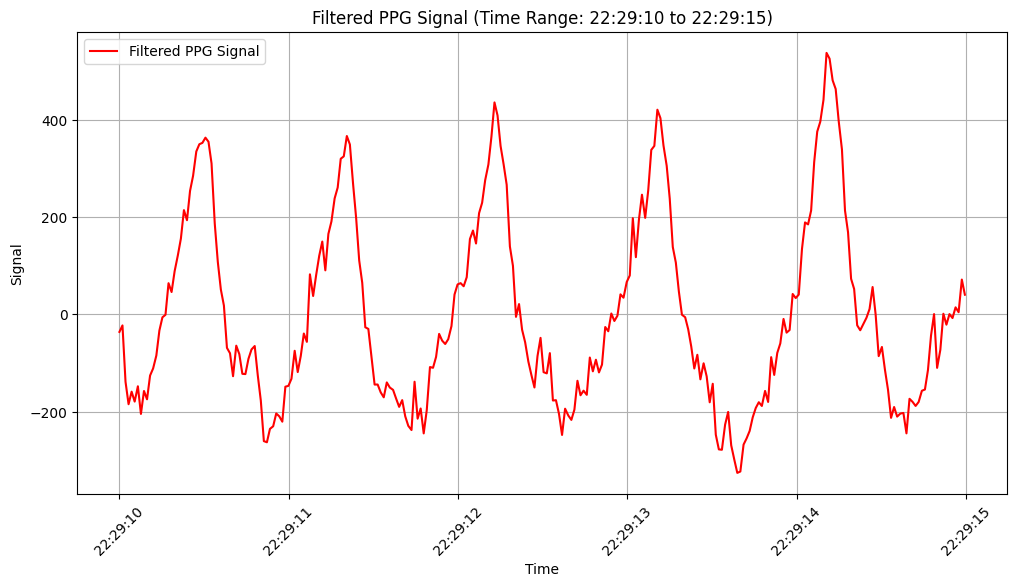

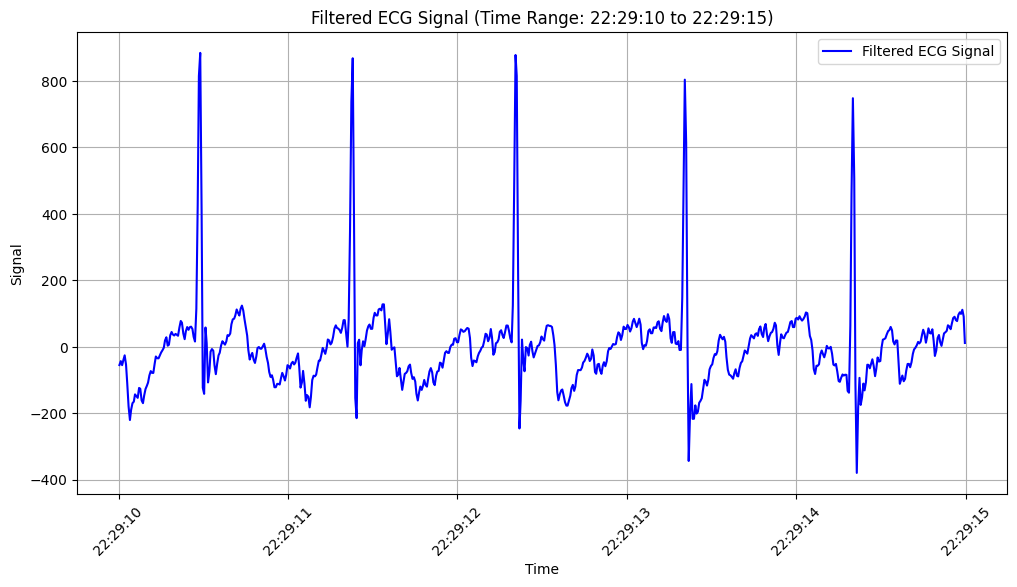

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Load PPG data
ppg_file = 'polar3/Polar_Sense_9F124324_20240425_222851_PPG_fixed.txt'
ppg_data = pd.read_csv(ppg_file, delimiter=';')

# Load ECG data
ecg_file = 'polar3/Polar_H10_83A00120_20240425_222850_ECG.txt'
ecg_data = pd.read_csv(ecg_file, delimiter=';')

# Convert timestamps to datetime objects
ppg_data['Phone timestamp'] = pd.to_datetime(ppg_data['Phone timestamp'])
ecg_data['Phone timestamp'] = pd.to_datetime(ecg_data['Phone timestamp'])

# Filter PPG data to the desired time range (from 22:29:10 to 22:29:15)
start_time = pd.Timestamp('2024-04-25 22:29:10')
end_time = pd.Timestamp('2024-04-25 22:29:15')
filtered_ppg_data = ppg_data[(ppg_data['Phone timestamp'] >= start_time) & (ppg_data['Phone timestamp'] <= end_time)]

# Filter ECG data to the desired time range (from 22:29:10 to 22:29:15)
filtered_ecg_data = ecg_data[(ecg_data['Phone timestamp'] >= start_time) & (ecg_data['Phone timestamp'] <= end_time)]

# Extract filtered PPG and ECG signals and timestamps
ppg_timestamps = filtered_ppg_data['Phone timestamp']
ppg_signal = filtered_ppg_data['channel 0']  # Assuming 'channel 0' is the PPG signal of interest

ecg_timestamps = filtered_ecg_data['Phone timestamp']
ecg_signal = filtered_ecg_data['ecg [uV]']  # Assuming 'ecg [uV]' is the ECG signal of interest

# Calculate the sampling frequency (Hz) for PPG and ECG
time_diff_ppg = ppg_timestamps.iloc[1] - ppg_timestamps.iloc[0]
fs_ppg = 1.0 / time_diff_ppg.total_seconds()  # PPG Sampling frequency in Hz

time_diff_ecg = ecg_timestamps.iloc[1] - ecg_timestamps.iloc[0]
fs_ecg = 1.0 / time_diff_ecg.total_seconds()  # ECG Sampling frequency in Hz

# Define high-pass filter parameters
cutoff_freq = 0.5  # Cutoff frequency in Hz

# Normalize cutoff frequency relative to Nyquist frequency for PPG
nyquist_freq_ppg = 0.5 * fs_ppg
normalized_cutoff_ppg = cutoff_freq / nyquist_freq_ppg

# Normalize cutoff frequency relative to Nyquist frequency for ECG
nyquist_freq_ecg = 0.5 * fs_ecg
normalized_cutoff_ecg = cutoff_freq / nyquist_freq_ecg

# Design a Butterworth high-pass filter for PPG
b_ppg, a_ppg = signal.butter(4, normalized_cutoff_ppg, btype='high')

# Design a Butterworth high-pass filter for ECG
b_ecg, a_ecg = signal.butter(4, normalized_cutoff_ecg, btype='high')

# Apply the high-pass filter to the PPG signal
filtered_ppg_signal = signal.filtfilt(b_ppg, a_ppg, ppg_signal)

# Apply the high-pass filter to the ECG signal
filtered_ecg_signal = signal.filtfilt(b_ecg, a_ecg, ecg_signal)

# Plot filtered PPG signal
plt.figure(figsize=(12, 6))
plt.plot(ppg_timestamps, filtered_ppg_signal, label='Filtered PPG Signal', color='red')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Filtered PPG Signal (Time Range: 22:29:10 to 22:29:15)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plot filtered ECG signal
plt.figure(figsize=(12, 6))
plt.plot(ecg_timestamps, filtered_ecg_signal, label='Filtered ECG Signal', color='blue')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Filtered ECG Signal (Time Range: 22:29:10 to 22:29:15)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


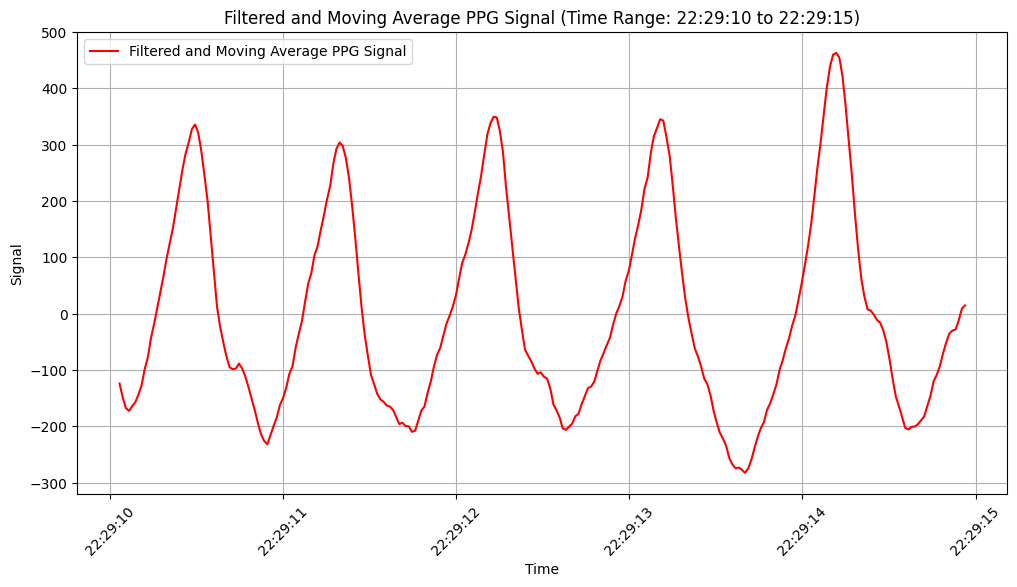

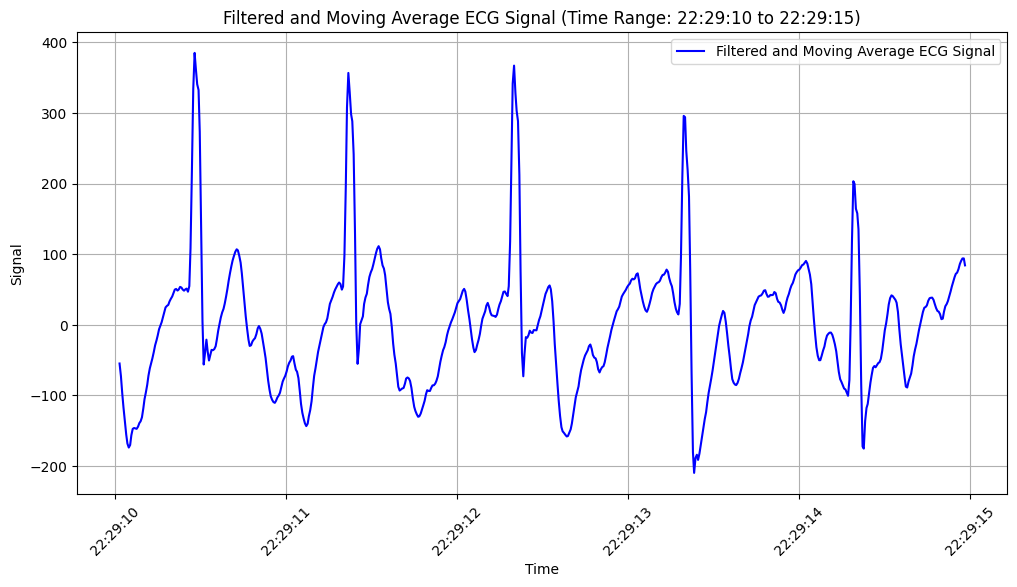

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Load PPG data
ppg_file = 'polar3/Polar_Sense_9F124324_20240425_222851_PPG_fixed.txt'
ppg_data = pd.read_csv(ppg_file, delimiter=';')

# Load ECG data
ecg_file = 'polar3/Polar_H10_83A00120_20240425_222850_ECG.txt'
ecg_data = pd.read_csv(ecg_file, delimiter=';')

# Convert timestamps to datetime objects
ppg_data['Phone timestamp'] = pd.to_datetime(ppg_data['Phone timestamp'])
ecg_data['Phone timestamp'] = pd.to_datetime(ecg_data['Phone timestamp'])

# Filter PPG data to the desired time range (from 22:29:10 to 22:29:15)
start_time = pd.Timestamp('2024-04-25 22:29:10')
end_time = pd.Timestamp('2024-04-25 22:29:15')
filtered_ppg_data = ppg_data[(ppg_data['Phone timestamp'] >= start_time) & (ppg_data['Phone timestamp'] <= end_time)]

# Filter ECG data to the desired time range (from 22:29:10 to 22:29:15)
filtered_ecg_data = ecg_data[(ecg_data['Phone timestamp'] >= start_time) & (ecg_data['Phone timestamp'] <= end_time)]

# Extract filtered PPG and ECG signals and timestamps
ppg_timestamps = filtered_ppg_data['Phone timestamp']
ppg_signal = filtered_ppg_data['channel 0']  # Assuming 'channel 0' is the PPG signal of interest

ecg_timestamps = filtered_ecg_data['Phone timestamp']
ecg_signal = filtered_ecg_data['ecg [uV]']  # Assuming 'ecg [uV]' is the ECG signal of interest

# Calculate the sampling frequency (Hz) for PPG and ECG
time_diff_ppg = ppg_timestamps.iloc[1] - ppg_timestamps.iloc[0]
fs_ppg = 1.0 / time_diff_ppg.total_seconds()  # PPG Sampling frequency in Hz

time_diff_ecg = ecg_timestamps.iloc[1] - ecg_timestamps.iloc[0]
fs_ecg = 1.0 / time_diff_ecg.total_seconds()  # ECG Sampling frequency in Hz

# Define high-pass filter parameters
cutoff_freq = 0.5  # Cutoff frequency in Hz

# Normalize cutoff frequency relative to Nyquist frequency for PPG
nyquist_freq_ppg = 0.5 * fs_ppg
normalized_cutoff_ppg = cutoff_freq / nyquist_freq_ppg

# Normalize cutoff frequency relative to Nyquist frequency for ECG
nyquist_freq_ecg = 0.5 * fs_ecg
normalized_cutoff_ecg = cutoff_freq / nyquist_freq_ecg

# Design a Butterworth high-pass filter for PPG
b_ppg, a_ppg = signal.butter(4, normalized_cutoff_ppg, btype='high')

# Design a Butterworth high-pass filter for ECG
b_ecg, a_ecg = signal.butter(4, normalized_cutoff_ecg, btype='high')

# Apply the high-pass filter to the PPG signal
filtered_ppg_signal = signal.filtfilt(b_ppg, a_ppg, ppg_signal)

# Apply the high-pass filter to the ECG signal
filtered_ecg_signal = signal.filtfilt(b_ecg, a_ecg, ecg_signal)

# Apply a moving average filter (window size = 7) to the filtered PPG signal
ma_window_size = 7
moving_avg_ppg = pd.Series(filtered_ppg_signal).rolling(window=ma_window_size, center=True).mean()

# Apply a moving average filter (window size = 7) to the filtered ECG signal
moving_avg_ecg = pd.Series(filtered_ecg_signal).rolling(window=ma_window_size, center=True).mean()

# Plot filtered and moving average PPG signal
plt.figure(figsize=(12, 6))
plt.plot(ppg_timestamps, moving_avg_ppg, label='Filtered and Moving Average PPG Signal', color='red')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Filtered and Moving Average PPG Signal (Time Range: 22:29:10 to 22:29:15)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plot filtered and moving average ECG signal
plt.figure(figsize=(12, 6))
plt.plot(ecg_timestamps, moving_avg_ecg, label='Filtered and Moving Average ECG Signal', color='blue')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Filtered and Moving Average ECG Signal (Time Range: 22:29:10 to 22:29:15)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


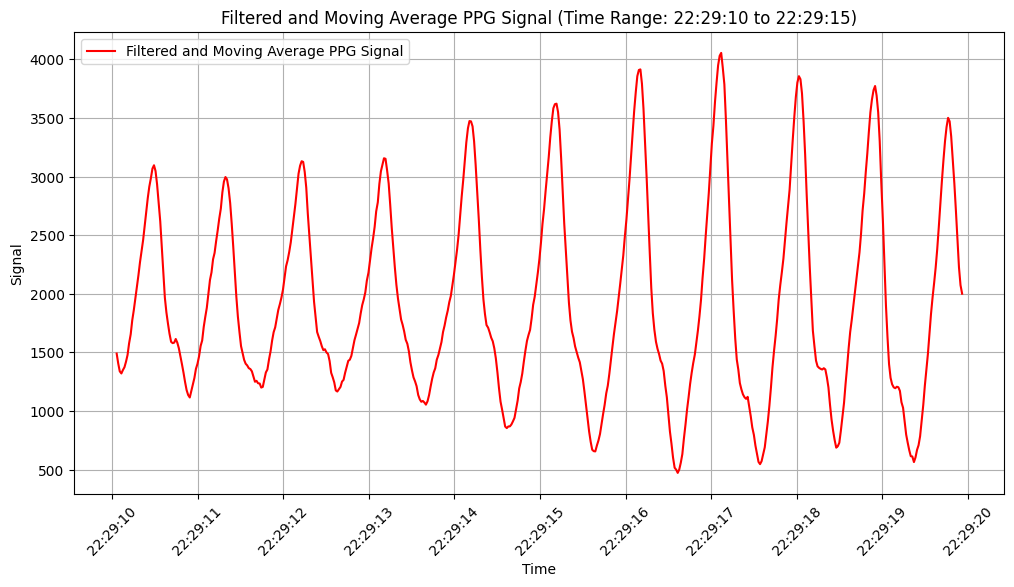

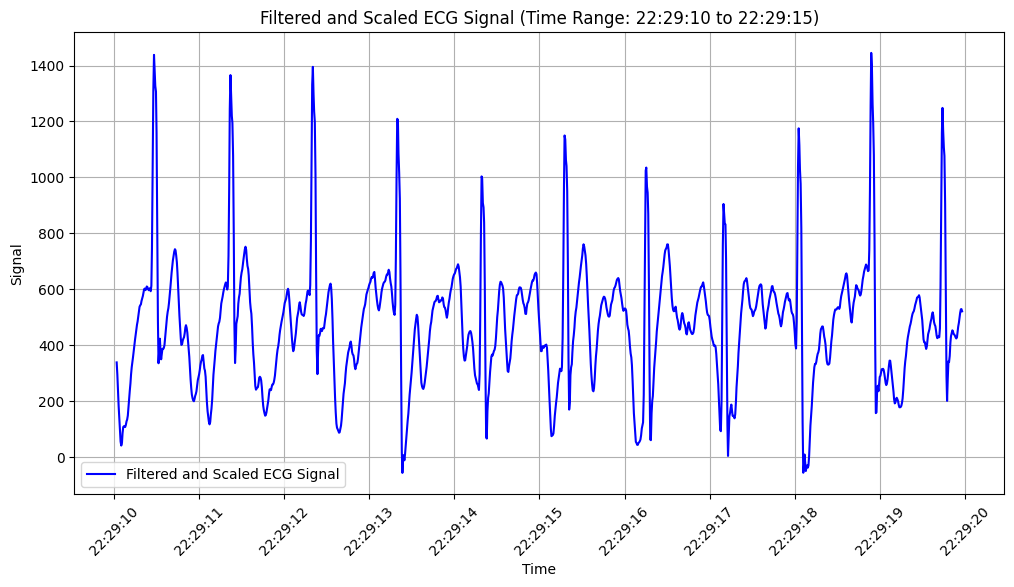

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Load PPG data
ppg_file = 'polar3/Polar_Sense_9F124324_20240425_222851_PPG_fixed.txt'
ppg_data = pd.read_csv(ppg_file, delimiter=';')

# Load ECG data
ecg_file = 'polar3/Polar_H10_83A00120_20240425_222850_ECG.txt'
ecg_data = pd.read_csv(ecg_file, delimiter=';')

# Convert timestamps to datetime objects
ppg_data['Phone timestamp'] = pd.to_datetime(ppg_data['Phone timestamp'])
ecg_data['Phone timestamp'] = pd.to_datetime(ecg_data['Phone timestamp'])

# Filter PPG data to the desired time range (from 22:29:10 to 22:29:15)
start_time = pd.Timestamp('2024-04-25 22:29:10')
end_time = pd.Timestamp('2024-04-25 22:29:20')
filtered_ppg_data = ppg_data[(ppg_data['Phone timestamp'] >= start_time) & (ppg_data['Phone timestamp'] <= end_time)]

# Filter ECG data to the desired time range (from 22:29:10 to 22:29:15)
filtered_ecg_data = ecg_data[(ecg_data['Phone timestamp'] >= start_time) & (ecg_data['Phone timestamp'] <= end_time)]

# Extract filtered PPG and ECG signals and timestamps
ppg_timestamps = filtered_ppg_data['Phone timestamp']
ppg_signal = filtered_ppg_data['channel 0']  # Assuming 'channel 0' is the PPG signal of interest

ecg_timestamps = filtered_ecg_data['Phone timestamp']
ecg_signal = filtered_ecg_data['ecg [uV]']  # Assuming 'ecg [uV]' is the ECG signal of interest

# Calculate the sampling frequency (Hz) for PPG and ECG
time_diff_ppg = ppg_timestamps.iloc[1] - ppg_timestamps.iloc[0]
fs_ppg = 1.0 / time_diff_ppg.total_seconds()  # PPG Sampling frequency in Hz

time_diff_ecg = ecg_timestamps.iloc[1] - ecg_timestamps.iloc[0]
fs_ecg = 1.0 / time_diff_ecg.total_seconds()  # ECG Sampling frequency in Hz

# Define high-pass filter parameters
cutoff_freq = 0.5  # Cutoff frequency in Hz

# Normalize cutoff frequency relative to Nyquist frequency for PPG
nyquist_freq_ppg = 0.5 * fs_ppg
normalized_cutoff_ppg = cutoff_freq / nyquist_freq_ppg

# Normalize cutoff frequency relative to Nyquist frequency for ECG
nyquist_freq_ecg = 0.5 * fs_ecg
normalized_cutoff_ecg = cutoff_freq / nyquist_freq_ecg

# Design a Butterworth high-pass filter for PPG
b_ppg, a_ppg = signal.butter(4, normalized_cutoff_ppg, btype='high')

# Design a Butterworth high-pass filter for ECG
b_ecg, a_ecg = signal.butter(4, normalized_cutoff_ecg, btype='high')

# Apply the high-pass filter to the PPG signal
filtered_ppg_signal = signal.filtfilt(b_ppg, a_ppg, ppg_signal)

# Apply the high-pass filter to the ECG signal
filtered_ecg_signal = signal.filtfilt(b_ecg, a_ecg, ecg_signal)

# Apply a moving average filter (window size = 7) to the filtered PPG signal
ma_window_size = 7
moving_avg_ppg = pd.Series(filtered_ppg_signal).rolling(window=ma_window_size, center=True).mean()

# Apply a moving average filter (window size = 7) to the filtered ECG signal
moving_avg_ecg = pd.Series(filtered_ecg_signal).rolling(window=ma_window_size, center=True).mean()

# Plot filtered and moving average PPG signal
plt.figure(figsize=(12, 6))
plt.plot(ppg_timestamps, (moving_avg_ppg + 550) * 3.5, label='Filtered and Moving Average PPG Signal', color='red')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Filtered and Moving Average PPG Signal (Time Range: 22:29:10 to 22:29:15)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plot filtered and moving average ECG signal (scaled by 2 and shifted up by 200)
plt.figure(figsize=(12, 6))
plt.plot(ecg_timestamps, (moving_avg_ecg + 190) * 2.5, label='Filtered and Scaled ECG Signal', color='blue')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Filtered and Scaled ECG Signal (Time Range: 22:29:10 to 22:29:15)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
